<a href="https://colab.research.google.com/github/Excelsior8Elpharah/Applied_Math_for_Data_Science/blob/main/apresenta%C3%A7%C3%A3o%20Portf%C3%B3lio%20Applied%20Math%20for%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Slide 1 – Título do Projeto

## Previsão de Demanda com Regressão Linear – Caso Wave Surfboards


# 🌊 Slide 2 – Introdução

**Contexto:** A Wave Surfboards é uma loja especializada em pranchas de surfe e enfrenta oscilações sazonais nas vendas.

**Problema:** Dificuldade de prever a demanda e alinhar ações de marketing e estoque com os períodos de maior ou menor procura.

**Objetivo:** Desenvolver um modelo de regressão linear que utilize dados climáticos e de marketing para prever vendas mensais.

# 📂 Slide 3 – Histórico de Vendas da Loja

🗣️ "Aqui vemos a evolução das vendas mês a mês. É possível perceber padrões de alta e baixa ao longo do ano."

📂 Faça o upload de todos os arquivos CSV (marketing, clima e vendas):


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (14).csv
Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (11).csv
Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (13).csv
📆 'campanhas_publicitarias_wave_surfboards (14).csv': coluna 'Data' definida como índice de tempo.

✅ 'campanhas_publicitarias_wave_surfboards (14).csv': valores ausentes preenchidos.

📆 'dados_meteorologicos_wave_surfboards (11).csv': coluna 'Data' definida como índice de tempo.

✅ 'dados_meteorologicos_wave_surfboards (11).csv': valores ausentes preenchidos.

📆 'historico_vendas_wave_surfboards (13).csv': coluna 'Data' definida como índice de tempo.

✅ 'historico_vendas_wave_surfboards (13).csv': valores ausentes preenchidos.



<ipython-input-17-031ca3831d6f>:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


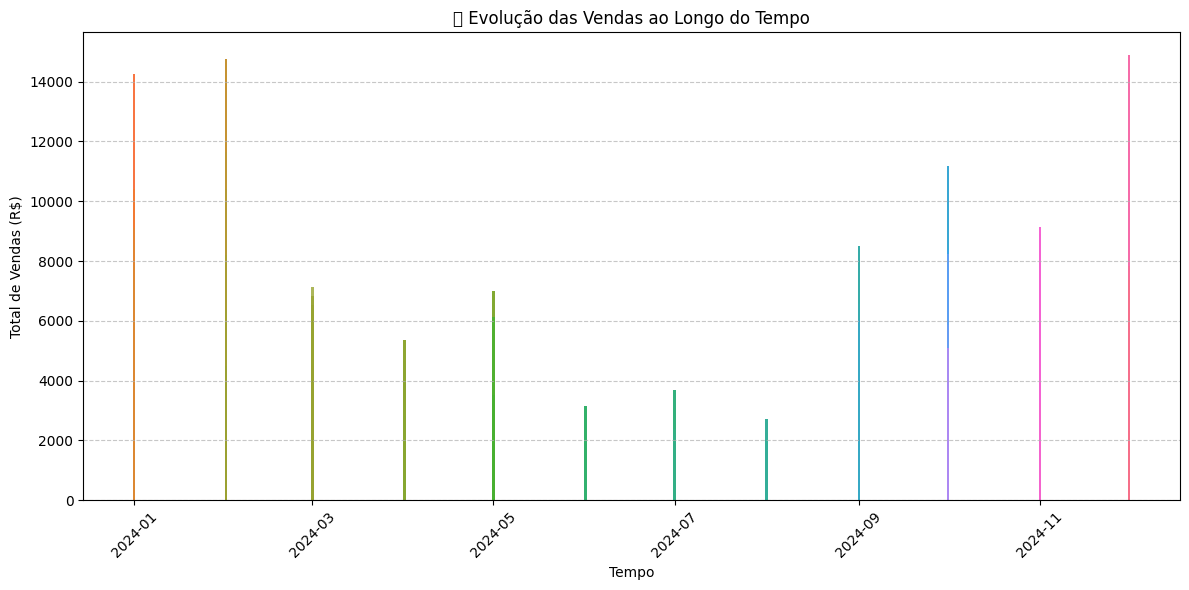

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.impute import SimpleImputer

# 📌 Função para carregar múltiplos arquivos CSV
def carregar_multiplos_csv():
    print("📂 Faça o upload de todos os arquivos CSV (marketing, clima e vendas):")
    uploaded_files = files.upload()
    dataframes = {}

    for nome_arquivo in uploaded_files:
        try:
            df = pd.read_csv(io.BytesIO(uploaded_files[nome_arquivo]))
            df.drop_duplicates(inplace=True)
            df.dropna(how='all', inplace=True)
            df.reset_index(drop=True, inplace=True)

            for col in df.columns:
                try:
                    df[col] = pd.to_datetime(df[col])
                    df.set_index(col, inplace=True)
                    print(f"📆 '{nome_arquivo}': coluna '{col}' definida como índice de tempo.\n")
                    break
                except:
                    continue

            colunas_numericas = df.select_dtypes(include=[np.number]).columns
            if colunas_numericas.any():
                imputer = SimpleImputer(strategy="mean")
                df[colunas_numericas] = imputer.fit_transform(df[colunas_numericas])
                print(f"✅ '{nome_arquivo}': valores ausentes preenchidos.\n")
            else:
                print(f"⚠ '{nome_arquivo}': nenhuma coluna numérica encontrada.\n")

            dataframes[nome_arquivo] = df

        except Exception as e:
            print(f"❌ Erro ao processar '{nome_arquivo}': {e}")

    return dataframes

# 📌 Carregar e tratar os dados
dfs = carregar_multiplos_csv()

# 📌 Garantir que os 3 arquivos foram carregados corretamente
if len(dfs) >= 3:
    try:
        # Renomear os dataframes com nomes mais simples
        vendas_df = next(df for nome, df in dfs.items() if "vendas" in nome.lower())
        clima_df = next(df for nome, df in dfs.items() if "meteorologico" in nome.lower())
        marketing_df = next(df for nome, df in dfs.items() if "campanha" in nome.lower())

        # 🔄 Unir os dados com base no índice (Data)
        df_geral = vendas_df.join([clima_df, marketing_df], how='inner')

        # 📊 Gráfico de Barras da Evolução das Vendas
        plt.figure(figsize=(12, 6))
        cores = sns.color_palette("husl", len(df_geral))

        # 🔎 Verifica e plota usando a coluna "Total Venda"
        if 'Total Venda' in df_geral.columns:
            plt.bar(df_geral.index, df_geral['Total Venda'], color=cores, alpha=0.8)
            plt.xlabel("Tempo")
            plt.ylabel("Total de Vendas (R$)")
            plt.title("📊 Evolução das Vendas ao Longo do Tempo")
            plt.xticks(rotation=45)
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print("❌ A coluna 'Total Venda' não foi encontrada nos dados combinados.")

    except Exception as e:
        print(f"⚠ Erro durante a união dos dados: {e}")
else:
    print("❌ Nem todos os arquivos foram carregados corretamente. Verifique os nomes.")


# ☀️🌧️ Slide 4 – Dados Meteorológicos

🗣️ "Temperatura e precipitação são importantes, principalmente para um produto sazonal como pranchas de surfe. Em meses mais quentes, a tendência é vender mais."

📂 Faça o upload do arquivo: dados_meteorologicos_wave_surfboards_.csv


Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (3).csv

✅ Arquivo 'dados_meteorologicos_wave_surfboards (3).csv' carregado com 366 linhas e 4 colunas.
📊 Colunas encontradas: ['Data', 'Estação', 'Temperatura Média (°C)', 'Precipitação (mm)']

📂 Faça o upload do arquivo: dados_meteorologicos_wave_surfboards_.csv


Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (4).csv

✅ Arquivo 'dados_meteorologicos_wave_surfboards (4).csv' carregado com 366 linhas e 4 colunas.
📊 Colunas encontradas: ['Data', 'Estação', 'Temperatura Média (°C)', 'Precipitação (mm)']



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


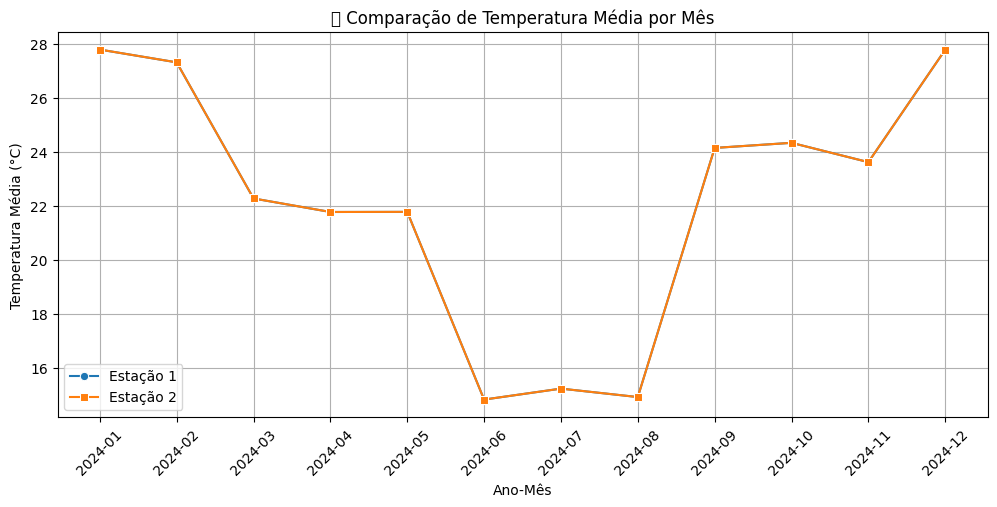

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


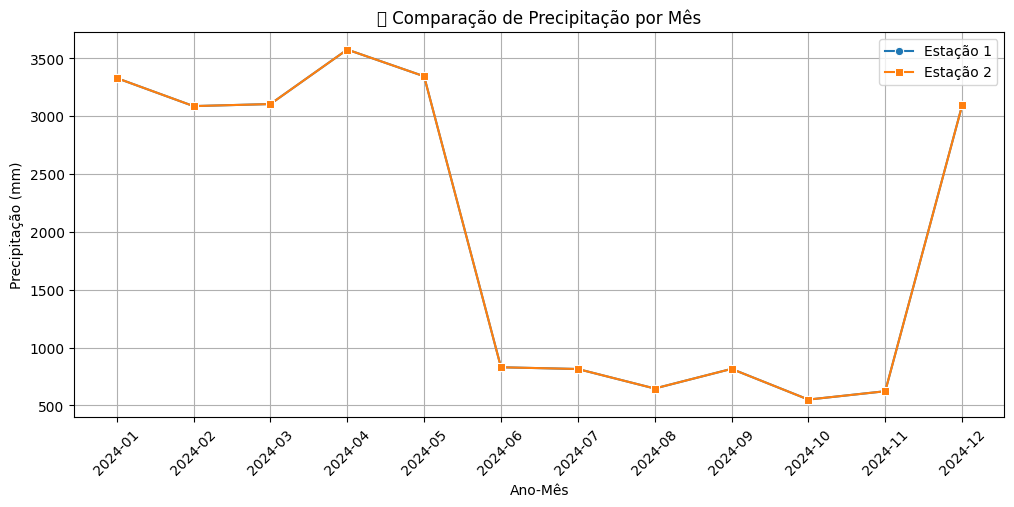

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()
    nome_real = list(uploaded_files.keys())[0]
    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")
        print(f"📊 Colunas encontradas: {list(df.columns)}\n")
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos dois arquivos meteorológicos
df1 = carregar_arquivo("dados_meteorologicos_wave_surfboards_.csv")
df2 = carregar_arquivo("dados_meteorologicos_wave_surfboards_.csv")

if df1 is not None and df2 is not None:
    # 🔹 Padronizar nomes de colunas
    for df in [df1, df2]:
        df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
        df["data"] = pd.to_datetime(df["data"], errors="coerce")

    # 📆 Agrupar por mês
    df1['ano_mes'] = df1["data"].dt.to_period("M")
    df2['ano_mes'] = df2["data"].dt.to_period("M")

    df1_agg = df1.groupby("ano_mes").agg({
        "temperatura_média_(°c)": "mean",
        "precipitação_(mm)": "sum"
    }).rename(columns={
        "temperatura_média_(°c)": "temp_média_1",
        "precipitação_(mm)": "precipitação_1"
    }).reset_index()

    df2_agg = df2.groupby("ano_mes").agg({
        "temperatura_média_(°c)": "mean",
        "precipitação_(mm)": "sum"
    }).rename(columns={
        "temperatura_média_(°c)": "temp_média_2",
        "precipitação_(mm)": "precipitação_2"
    }).reset_index()

    # 🔁 Juntar os dois DataFrames pela data
    df_comparado = pd.merge(df1_agg, df2_agg, on="ano_mes", how="inner")

    # 📊 Gráfico de comparação de temperatura média
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df_comparado["ano_mes"].astype(str), y=df_comparado["temp_média_1"], marker="o", label="Estação 1")
    sns.lineplot(x=df_comparado["ano_mes"].astype(str), y=df_comparado["temp_média_2"], marker="s", label="Estação 2")
    plt.title("📈 Comparação de Temperatura Média por Mês")
    plt.xlabel("Ano-Mês")
    plt.ylabel("Temperatura Média (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

    # 📊 Gráfico de comparação de precipitação
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df_comparado["ano_mes"].astype(str), y=df_comparado["precipitação_1"], marker="o", label="Estação 1")
    sns.lineplot(x=df_comparado["ano_mes"].astype(str), y=df_comparado["precipitação_2"], marker="s", label="Estação 2")
    plt.title("🌧️ Comparação de Precipitação por Mês")
    plt.xlabel("Ano-Mês")
    plt.ylabel("Precipitação (mm)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("❌ Erro no carregamento dos arquivos.")

# 📢 Slide 5 – Investimentos em Campanhas

🗣️ "Aqui temos os valores investidos em campanhas promocionais. Isso vai nos ajudar a entender se houve impacto direto nas vendas."

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards_1.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (3).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (3).csv' carregado com 43 linhas e 4 colunas.
📊 Colunas encontradas: ['Data', 'Estação', 'Tipo de Campanha', 'Investimento (R$)']

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards_2.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (4).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (4).csv' carregado com 43 linhas e 4 colunas.
📊 Colunas encontradas: ['Data', 'Estação', 'Tipo de Campanha', 'Investimento (R$)']



<ipython-input-5-bd6aa06bf999>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


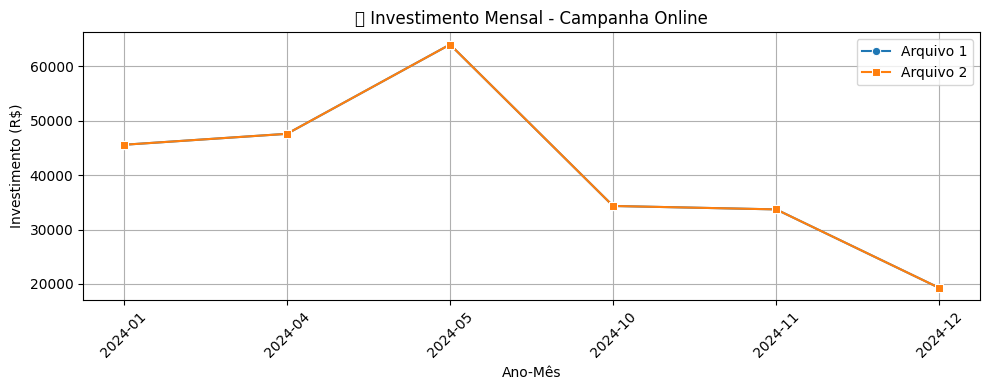

<ipython-input-5-bd6aa06bf999>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


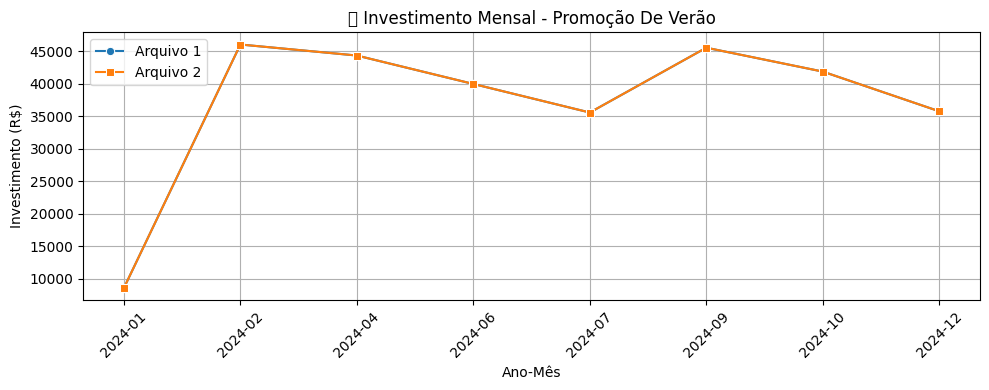

<ipython-input-5-bd6aa06bf999>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


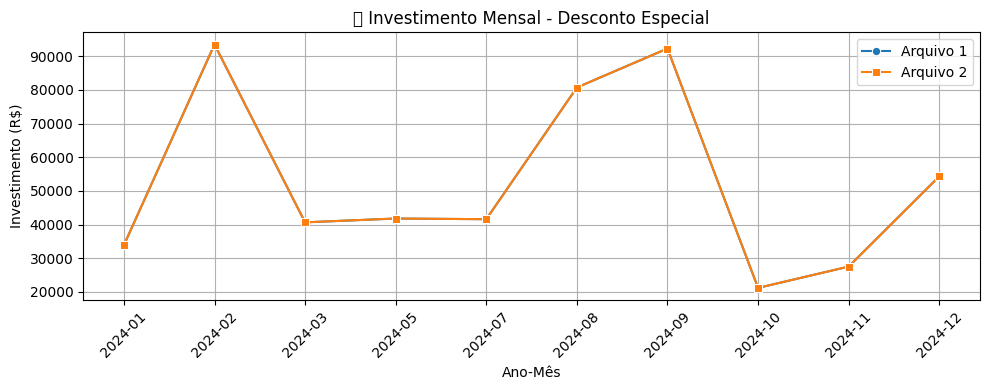

<ipython-input-5-bd6aa06bf999>:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


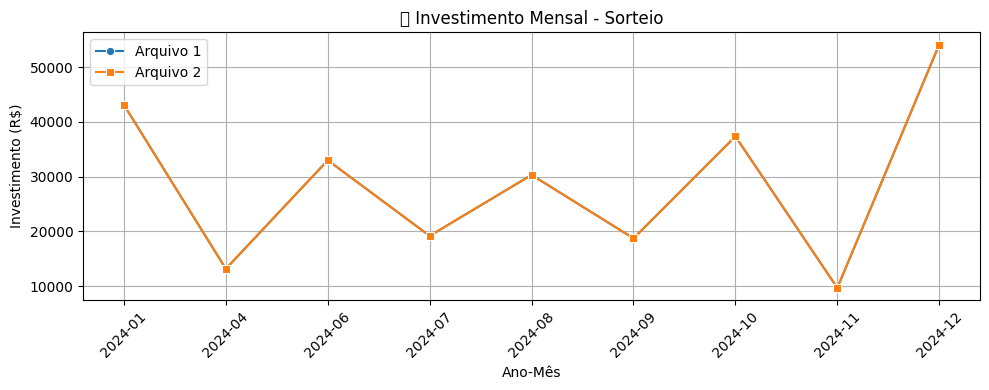

KeyError: 'Tipo de Campanha'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()
    nome_real = list(uploaded_files.keys())[0]
    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")
        print(f"📊 Colunas encontradas: {list(df.columns)}\n")
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos dois arquivos de campanhas
df1 = carregar_arquivo("campanhas_publicitarias_wave_surfboards_1.csv")
df2 = carregar_arquivo("campanhas_publicitarias_wave_surfboards_2.csv")

if df1 is not None and df2 is not None:
    # 🔹 Padronizar nomes de colunas e tipos
    for df in [df1, df2]:
        df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
        df["data"] = pd.to_datetime(df["data"], errors="coerce")
        df["tipo_de_campanha"] = df["tipo_de_campanha"].str.strip().str.title()

    # ✅ Identificar a coluna de investimento dinamicamente
    col_invest = [col for col in df1.columns if "investimento" in col][0]

    # 📆 Criar coluna ano-mês para agrupamento
    df1['ano_mes'] = df1["data"].dt.to_period("M")
    df2['ano_mes'] = df2["data"].dt.to_period("M")

    # 📊 Agrupar por tipo de campanha e mês
    agg1 = df1.groupby(["ano_mes", "tipo_de_campanha"])[col_invest].sum().reset_index().rename(columns={col_invest: "investimento_1"})
    agg2 = df2.groupby(["ano_mes", "tipo_de_campanha"])[col_invest].sum().reset_index().rename(columns={col_invest: "investimento_2"})

    # 🔁 Unir os dois para comparação
    df_comparado = pd.merge(agg1, agg2, on=["ano_mes", "tipo_de_campanha"], how="outer").fillna(0)

    # 📌 Gráfico: comparação de investimento mensal por tipo de campanha
    tipos_campanha = ["Campanha Online", "Promoção De Verão", "Desconto Especial", "Sorteio"]
    for tipo in tipos_campanha:
        df_tipo = df_comparado[df_comparado["tipo_de_campanha"] == tipo]

        plt.figure(figsize=(10, 4))
        sns.lineplot(x=df_tipo["ano_mes"].astype(str), y=df_tipo["investimento_1"], marker="o", label="Arquivo 1")
        sns.lineplot(x=df_tipo["ano_mes"].astype(str), y=df_tipo["investimento_2"], marker="s", label="Arquivo 2")
        plt.title(f"📊 Investimento Mensal - {tipo}")
        plt.xlabel("Ano-Mês")
        plt.ylabel("Investimento (R$)")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # 📌 Gráfico: frequência total de campanhas por tipo
    freq1 = df1["tipo_de_campanha"].value_counts().rename("frequência_1")
    freq2 = df2["tipo_de_campanha"].value_counts().rename("frequência_2")
    df_freq = pd.concat([freq1, freq2], axis=1).fillna(0).astype(int).reset_index().rename(columns={"index": "Tipo de Campanha"})

    # 📊 Comparar frequência de campanhas
    df_freq.plot(x="Tipo de Campanha", kind="bar", figsize=(8, 5), color=["skyblue", "orange"])
    plt.title("📊 Frequência de Campanhas por Tipo")
    plt.ylabel("Quantidade de campanhas")
    plt.xticks(rotation=30)
    plt.legend(["Arquivo 1", "Arquivo 2"])
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Erro no carregamento dos arquivos.")

# 🔍 Slide 6 – Correlação entre Variáveis (Análise Exploratória)

🗣️ "Esse gráfico mostra como cada variável se relaciona com as outras. Notamos uma correlação positiva entre temperatura, marketing e vendas."

📂 Faça o upload de 3 arquivos CSV:


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (5).csv
Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (5).csv
Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (3).csv
✅ Arquivo 'campanhas_publicitarias_wave_surfboards (5).csv' carregado! 43 linhas antes da limpeza.
✅ Arquivo 'campanhas_publicitarias_wave_surfboards (5).csv' após limpeza: 43 linhas restantes.
✅ Arquivo 'dados_meteorologicos_wave_surfboards (5).csv' carregado! 366 linhas antes da limpeza.
✅ Arquivo 'dados_meteorologicos_wave_surfboards (5).csv' após limpeza: 366 linhas restantes.
✅ Arquivo 'historico_vendas_wave_surfboards (3).csv' carregado! 14286 linhas antes da limpeza.
✅ Arquivo 'historico_vendas_wave_surfboards (3).csv' após limpeza: 14286 linhas restantes.
📈 Erro Quadrático Médio (MSE): 0.6546
📈 Coeficiente de Determinação (R²): -0.0002


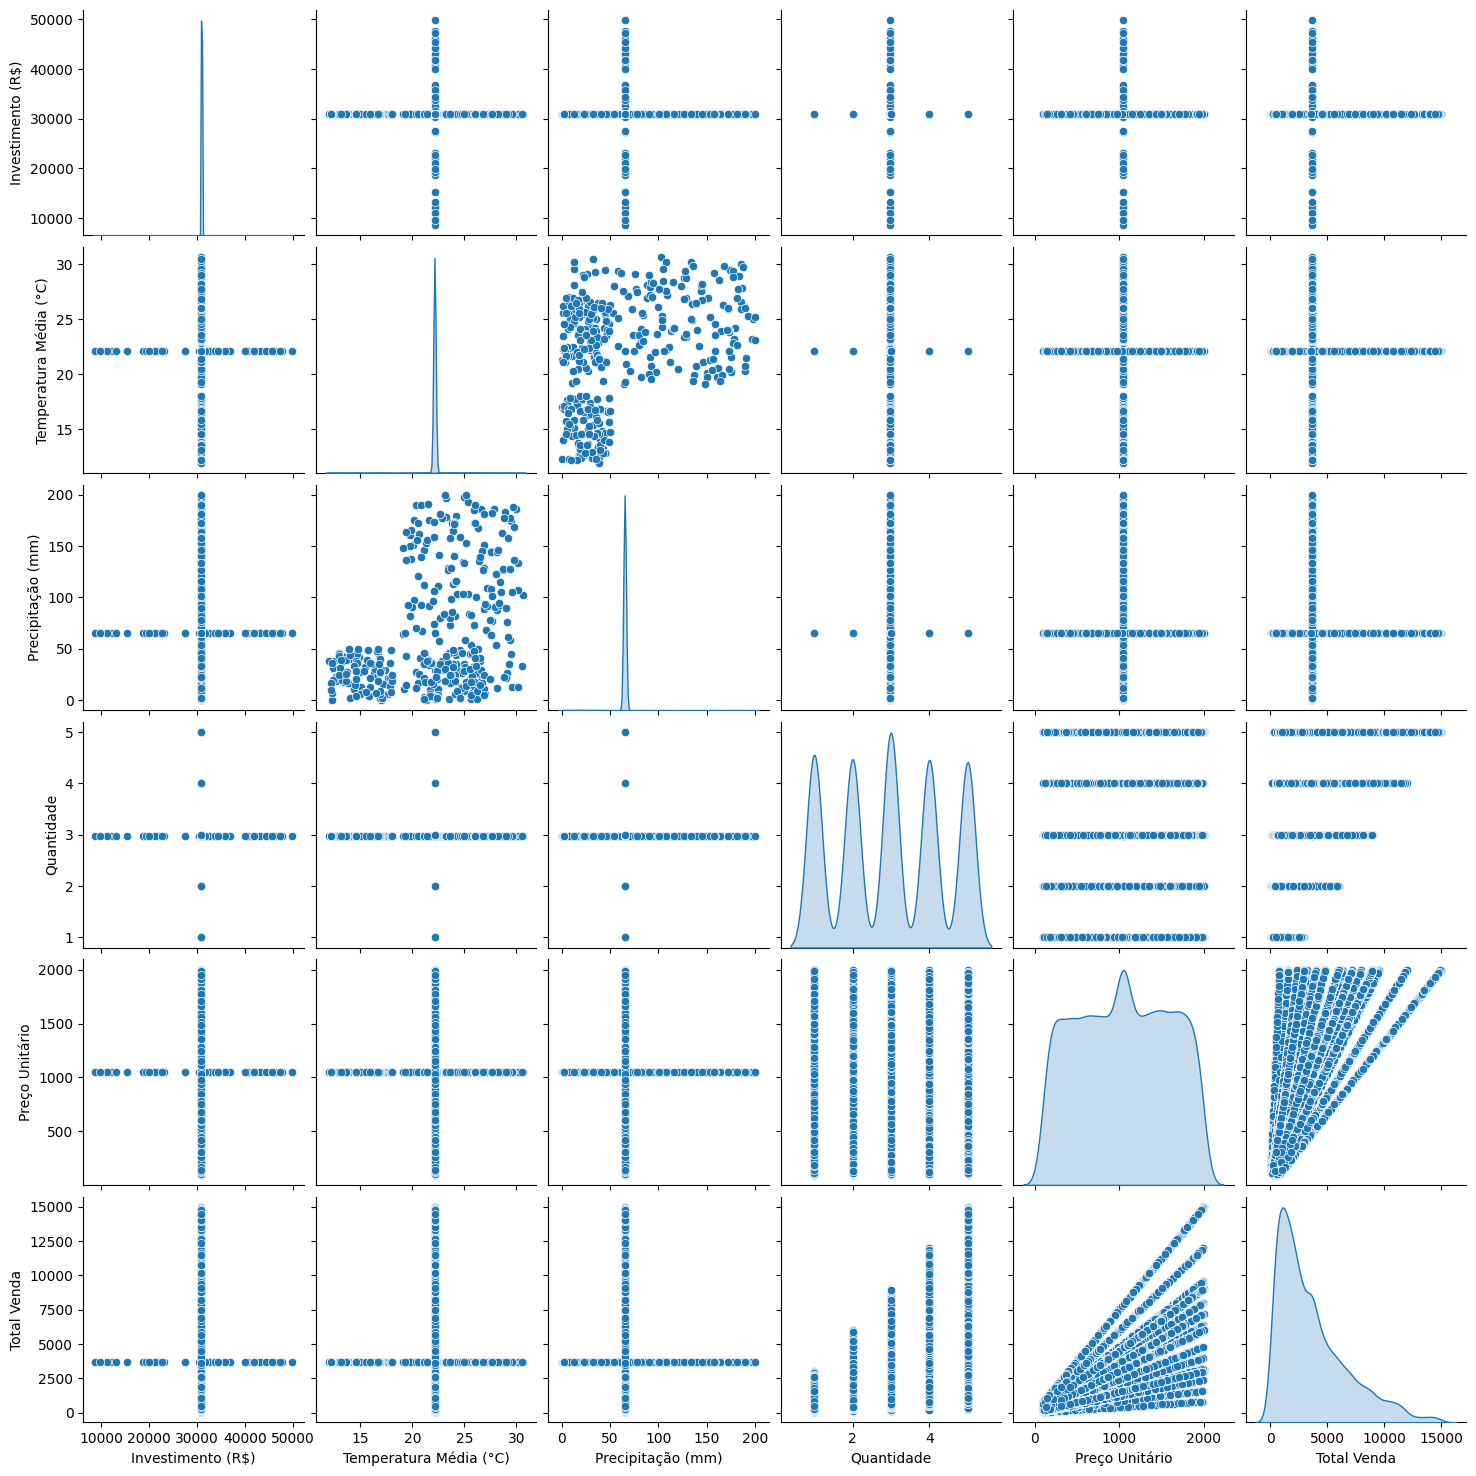

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Para tratar valores ausentes

# 📌 Função para carregar arquivos
def carregar_arquivos():
    print("📂 Faça o upload de 3 arquivos CSV:")
    uploaded_files = files.upload()

    dataframes = []

    for nome_arquivo in uploaded_files.keys():
        try:
            df = pd.read_csv(io.BytesIO(uploaded_files[nome_arquivo]))
            print(f"✅ Arquivo '{nome_arquivo}' carregado! {df.shape[0]} linhas antes da limpeza.")

            # 🔹 Limpeza dos dados
            df.drop_duplicates(inplace=True)  # Remove duplicatas
            df.reset_index(drop=True, inplace=True)  # Reseta o índice

            print(f"✅ Arquivo '{nome_arquivo}' após limpeza: {df.shape[0]} linhas restantes.")
            dataframes.append(df)
        except Exception as e:
            print(f"⚠ Erro ao processar {nome_arquivo}: {e}")

    # 🔹 Unir todos os arquivos processados em um único dataframe
    if dataframes:
        df_final = pd.concat(dataframes, ignore_index=True)
        return df_final
    else:
        print("❌ Nenhum arquivo válido foi carregado.")
        return None

# 📌 Carregar e processar os arquivos
df_tratado = carregar_arquivos()

# 🔹 Se houver dados tratados, prosseguir com a análise
if df_tratado is not None:
    # 📌 Verificar colunas numéricas para análise
    colunas_numericas = df_tratado.select_dtypes(include=[np.number]).columns.tolist()

    if len(colunas_numericas) < 2:
        print("❌ Não há colunas numéricas suficientes para análise de regressão.")
    else:
        # 📌 Imputação de valores NaN com a média
        imputer = SimpleImputer(strategy="mean")
        df_tratado[colunas_numericas] = imputer.fit_transform(df_tratado[colunas_numericas])

        # 📊 Análise de Regressão Linear
        x_col = colunas_numericas[0]  # Primeira variável independente
        y_col = colunas_numericas[1]  # Segunda variável dependente

        X = df_tratado[[x_col]].values  # Features
        y = df_tratado[y_col].values  # Target

        # 🔹 Divisão treino/teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 🔹 Modelo de regressão linear
        modelo = LinearRegression()
        modelo.fit(X_train, y_train)

        # 📌 Predições
        y_pred = modelo.predict(X_test)

        # 📊 Métricas de Avaliação
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"📈 Erro Quadrático Médio (MSE): {mse:.4f}")
        print(f"📈 Coeficiente de Determinação (R²): {r2:.4f}")

        # 📊 Gráfico de Dispersão - Correlação entre Variáveis
        sns.pairplot(df_tratado[colunas_numericas], diag_kind='kde')
        plt.show()

# 🌡️ Slide 7 – Temperatura vs Vendas (Dispersão)

🗣️ "Quando a temperatura aumenta, vemos que as vendas também tendem a crescer. Isso confirma a sazonalidade do produto."

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


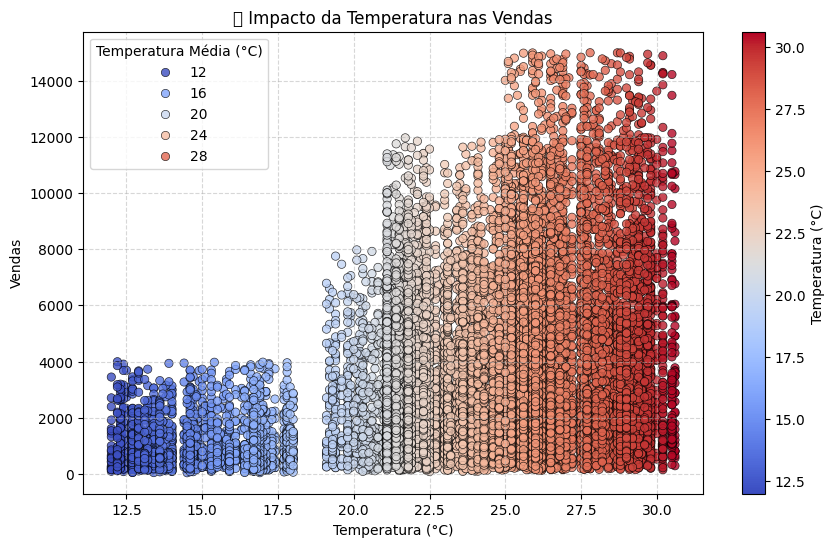

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 📌 Carregar os arquivos CSV
df_vendas = pd.read_csv("historico_vendas_wave_surfboards.csv")
df_temp = pd.read_csv("dados_meteorologicos_wave_surfboards.csv")

# 🔹 Padronizar os nomes das colunas para evitar erros de capitalização
df_vendas.columns = df_vendas.columns.str.strip()
df_temp.columns = df_temp.columns.str.strip()

# 📆 Converter a coluna "Data" para o formato de data
df_vendas["Data"] = pd.to_datetime(df_vendas["Data"])
df_temp["Data"] = pd.to_datetime(df_temp["Data"])

# 🔹 Fazer o merge dos DataFrames com base na data
df_merged = pd.merge(df_vendas, df_temp, on="Data", how="inner")

# 📌 Verificar as colunas corretas de temperatura e vendas
col_vendas = [col for col in df_merged.columns if "Venda" in col]
col_temp = [col for col in df_merged.columns if "Temperatura" in col]

if col_vendas and col_temp:
    col_vendas = col_vendas[0]
    col_temp = col_temp[0]

    # 📊 Criar figura e eixo
    fig, ax = plt.subplots(figsize=(10, 6))

    # Normalizar cores para o gráfico
    norm = plt.Normalize(df_merged[col_temp].min(), df_merged[col_temp].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])  # Corrigido para evitar erro na barra de cores

    # Criar gráfico de dispersão
    scatter = sns.scatterplot(
        ax=ax,
        x=df_merged[col_temp],
        y=df_merged[col_vendas],
        hue=df_merged[col_temp],  # Cores baseadas na temperatura
        palette="coolwarm",
        alpha=0.8,
        edgecolor="black"
    )

    # 🔹 Personalizar gráfico
    ax.set_xlabel("Temperatura (°C)")
    ax.set_ylabel("Vendas")
    ax.set_title("📈 Impacto da Temperatura nas Vendas")
    ax.grid(True, linestyle="--", alpha=0.5)

    # 📌 Adicionar barra de cores
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("Temperatura (°C)")

    plt.show()
else:
    print("❌ Colunas de temperatura ou vendas não encontradas no dataset.")

# 💸 Slide 8 – Marketing vs Vendas (Dispersão)

🗣️ "Esse gráfico deixa bem claro que mais investimento em marketing tende a gerar mais vendas."

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (6).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (6).csv' carregado com 43 linhas e 4 colunas.

📊 Colunas encontradas: ['Data', 'Estação', 'Tipo de Campanha', 'Investimento (R$)']

📂 Faça o upload do arquivo: historico_vendas_wave_surfboards.csv


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (4).csv

✅ Arquivo 'historico_vendas_wave_surfboards (4).csv' carregado com 14286 linhas e 6 colunas.

📊 Colunas encontradas: ['Data', 'Produto', 'Quantidade', 'Preço Unitário', 'Total Venda', 'Estação']



<ipython-input-8-08a84d0528d1>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_merged["orcamento_marketing"], y=df_merged["vendas"], palette=cores)
<ipython-input-8-08a84d0528d1>:53: UserWarning: The palette list has more values (1557) than needed (43), which may not be intended.
  sns.barplot(x=df_merged["orcamento_marketing"], y=df_merged["vendas"], palette=cores)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


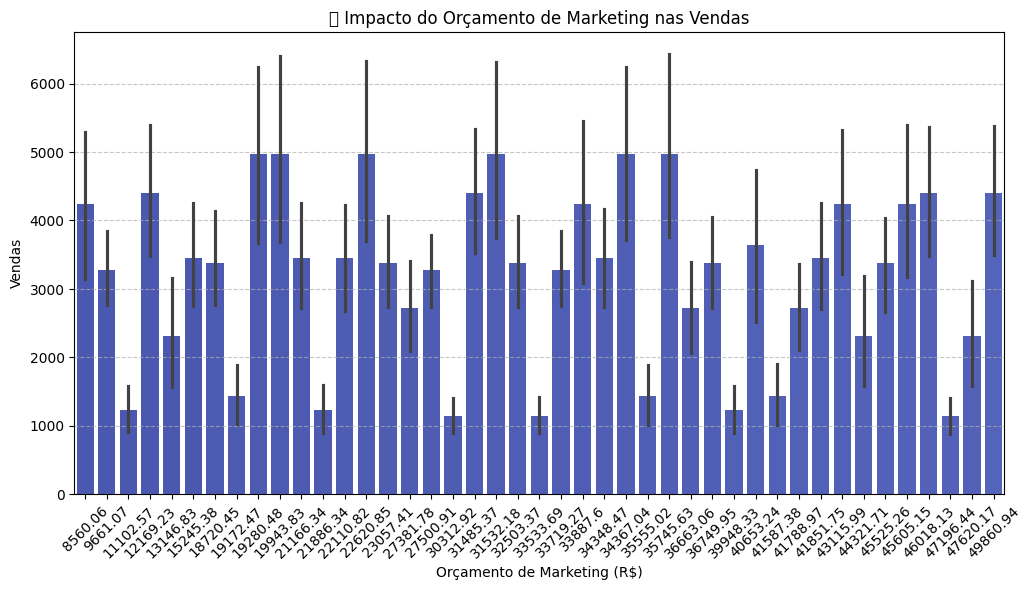

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()

    # Obtém o nome real do arquivo do dicionário de uploads
    nome_real = list(uploaded_files.keys())[0]

    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
        print(f"📊 Colunas encontradas: {list(df.columns)}\n")  # Exibir colunas para depuração
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos arquivos
df_marketing = carregar_arquivo("campanhas_publicitarias_wave_surfboards.csv")
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards.csv")

# 📊 Criar gráfico se os dados forem carregados corretamente
if df_marketing is not None and df_vendas is not None:
    # 🔹 Normalizar nomes das colunas
    df_marketing.columns = df_marketing.columns.str.strip().str.lower().str.replace(" ", "_")
    df_vendas.columns = df_vendas.columns.str.strip().str.lower().str.replace(" ", "_")

    # 📌 Renomear as colunas para um padrão mais intuitivo
    df_marketing.rename(columns={"investimento_(r$)": "orcamento_marketing"}, inplace=True)
    df_vendas.rename(columns={"total_venda": "vendas"}, inplace=True)

    # 📆 Converter datas se houver uma coluna de data
    if "data" in df_marketing.columns and "data" in df_vendas.columns:
        df_marketing["data"] = pd.to_datetime(df_marketing["data"], errors="coerce")
        df_vendas["data"] = pd.to_datetime(df_vendas["data"], errors="coerce")

        # 🔹 Unir os DataFrames com base na data
        df_merged = pd.merge(df_marketing, df_vendas, on="data", how="inner")
    else:
        df_merged = None
        print("❌ Coluna 'Data' não encontrada nos arquivos para realizar o merge.")

    # 📌 Verificar se as colunas necessárias estão no dataset combinado
    if df_merged is not None and "orcamento_marketing" in df_merged.columns and "vendas" in df_merged.columns:
        plt.figure(figsize=(12, 6))
        cores = sns.color_palette("coolwarm", len(df_merged))  # Paleta de cores
        sns.barplot(x=df_merged["orcamento_marketing"], y=df_merged["vendas"], palette=cores)
        plt.xlabel("Orçamento de Marketing (R$)")
        plt.ylabel("Vendas")
        plt.title("📊 Impacto do Orçamento de Marketing nas Vendas")
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()
    else:
        print(f"❌ Colunas 'orcamento_marketing' e 'vendas' não encontradas após normalização. Verifique os nomes reais: {list(df_merged.columns) if df_merged is not None else 'Nenhum dado disponível'}")

# 🧩 Slide 9 – Tipos de Campanha vs Vendas

🗣️ "Além do valor investido, o tipo de campanha também importa. Algumas campanhas foram mais eficazes que outras."

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (7).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (7).csv' carregado com 43 linhas e 4 colunas.

📊 Colunas encontradas: ['Data', 'Estação', 'Tipo de Campanha', 'Investimento (R$)']

📂 Faça o upload do arquivo: historico_vendas_wave_surfboards.csv


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (5).csv

✅ Arquivo 'historico_vendas_wave_surfboards (5).csv' carregado com 14286 linhas e 6 colunas.

📊 Colunas encontradas: ['Data', 'Produto', 'Quantidade', 'Preço Unitário', 'Total Venda', 'Estação']



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


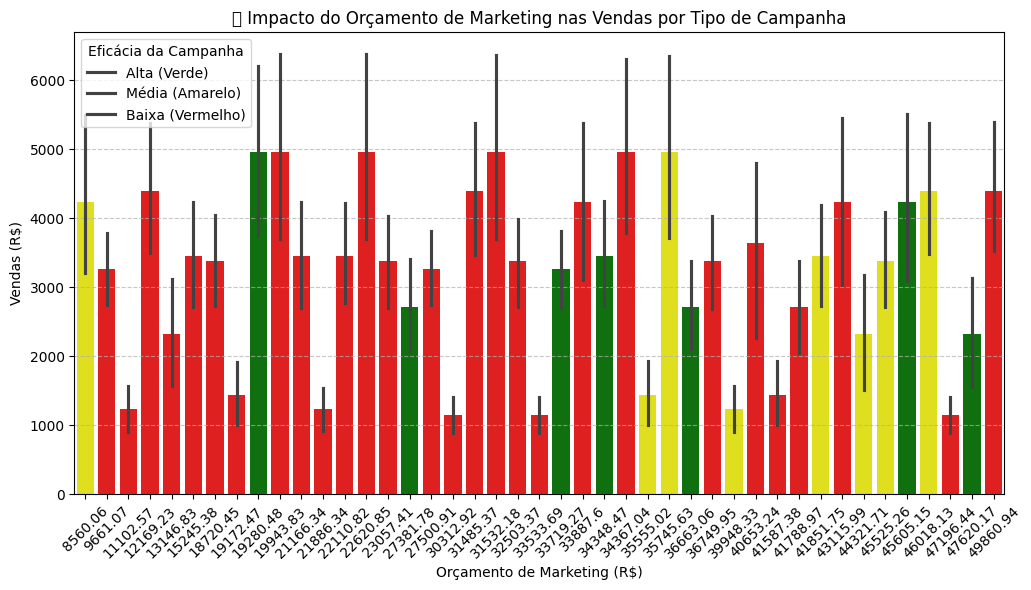

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()

    # Obtém o nome real do arquivo do dicionário de uploads
    nome_real = list(uploaded_files.keys())[0]

    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
        print(f"📊 Colunas encontradas: {list(df.columns)}\n")  # Exibir colunas para depuração
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos arquivos
df_marketing = carregar_arquivo("campanhas_publicitarias_wave_surfboards.csv")
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards.csv")

# 📊 Criar gráfico se os dados forem carregados corretamente
if df_marketing is not None and df_vendas is not None:
    # 🔹 Normalizar nomes das colunas
    df_marketing.columns = df_marketing.columns.str.strip().str.lower().str.replace(" ", "_")
    df_vendas.columns = df_vendas.columns.str.strip().str.lower().str.replace(" ", "_")

    # 📌 Renomear as colunas para um padrão mais intuitivo
    df_marketing.rename(columns={"investimento_(r$)": "orcamento_marketing", "tipo_de_campanha": "tipo_campanha"}, inplace=True)
    df_vendas.rename(columns={"total_venda": "vendas"}, inplace=True)

    # 📆 Converter datas se houver uma coluna de data
    if "data" in df_marketing.columns and "data" in df_vendas.columns:
        df_marketing["data"] = pd.to_datetime(df_marketing["data"], errors="coerce")
        df_vendas["data"] = pd.to_datetime(df_vendas["data"], errors="coerce")

        # 🔹 Unir os DataFrames com base na data
        df_merged = pd.merge(df_marketing, df_vendas, on="data", how="inner")
    else:
        df_merged = None
        print("❌ Coluna 'Data' não encontrada nos arquivos para realizar o merge.")

    # 📌 Verificar se as colunas necessárias estão no dataset combinado
    if df_merged is not None and "orcamento_marketing" in df_merged.columns and "vendas" in df_merged.columns and "tipo_campanha" in df_merged.columns:

        # 📌 Função para definir a cor com base no orçamento de marketing e vendas
        def definir_cor(row):
            if row["orcamento_marketing"] <= row["vendas"] * 0.3:  # Bom (baixo custo, alto retorno)
                return "green"
            elif row["orcamento_marketing"] <= row["vendas"] * 0.6:  # Médio (custo razoável, retorno moderado)
                return "yellow"
            else:  # Ruim (alto custo, baixo retorno)
                return "red"

        # 📌 Aplicar a função para definir cores
        df_merged["cor"] = df_merged.apply(definir_cor, axis=1)

        # 📌 Classificação das campanhas
        campanha_eficaz = ["Campanha Online"]
        campanha_media = ["Promoção de Verão"]
        campanha_ruim = ["Desconto Especial", "Sorteio"]

        def classificar_campanha(tipo):
            if tipo in campanha_eficaz:
                return "green"
            elif tipo in campanha_media:
                return "yellow"
            else:
                return "red"

        # 📌 Aplicar classificação nas campanhas
        df_merged["cor_campanha"] = df_merged["tipo_campanha"].apply(classificar_campanha)

        # 📊 Criar gráfico de barras mostrando a relação entre orçamento e vendas, destacando campanhas
        plt.figure(figsize=(12, 6))
        sns.barplot(x=df_merged["orcamento_marketing"], y=df_merged["vendas"], hue=df_merged["cor_campanha"], dodge=False, palette={"green": "green", "yellow": "yellow", "red": "red"})
        plt.xlabel("Orçamento de Marketing (R$)")
        plt.ylabel("Vendas (R$)")
        plt.title("📊 Impacto do Orçamento de Marketing nas Vendas por Tipo de Campanha")
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.legend(title="Eficácia da Campanha", labels=["Alta (Verde)", "Média (Amarelo)", "Baixa (Vermelho)"])
        plt.show()

    else:
        print(f"❌ Colunas 'orcamento_marketing', 'vendas' ou 'tipo_campanha' não encontradas após normalização. Verifique os nomes reais: {list(df_merged.columns) if df_merged is not None else 'Nenhum dado disponível'}")

# 🧠📈 Slide – Modelo de Regressão Linear: Construção e Avaliação

🗣️ "Criei um modelo de regressão linear múltipla utilizando as variáveis temperatura e investimento em marketing para prever as vendas da Wave Surfboards. Abaixo, vemos a comparação entre os valores previstos pelo modelo (linha laranja) e os valores reais de vendas (linha azul). A proximidade entre as duas curvas indica que o modelo teve um bom desempenho na previsão."


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.9 MB/s eta 0:00:00
📂 Faça o upload do arquivo: historico_vendas_wave_surfboards.csv


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (6).csv

✅ Arquivo 'historico_vendas_wave_surfboards (6).csv' carregado com 14286 linhas e 6 colunas.

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (8).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (8).csv' carregado com 43 linhas e 4 colunas.

📂 Faça o upload do arquivo: dados_meteorologicos_wave_surfboards.csv


Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (6).csv

✅ Arquivo 'dados_meteorologicos_wave_surfboards (6).csv' carregado com 366 linhas e 4 colunas.



<ipython-input-10-dcc2b7126e22>:79: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-dcc2b7126e22>:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(grafico_path)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


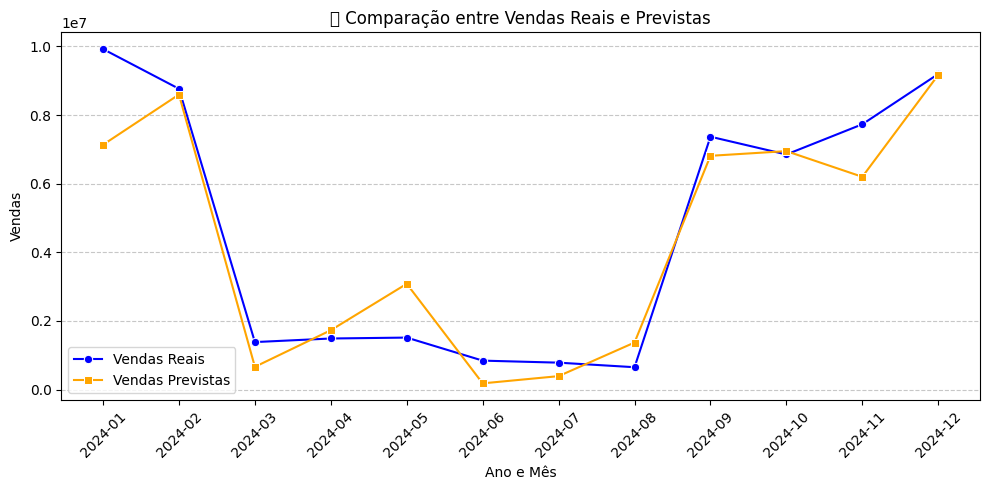

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!pip install python-pptx

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()
    nome_real = list(uploaded_files.keys())[0]

    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📁 Upload dos arquivos
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards.csv")
df_marketing = carregar_arquivo("campanhas_publicitarias_wave_surfboards.csv")
df_meteorologia = carregar_arquivo("dados_meteorologicos_wave_surfboards.csv")

if df_vendas is not None and df_marketing is not None and df_meteorologia is not None:
    # 🔧 Renomear colunas
    df_vendas.rename(columns={"Total Venda": "Vendas_Reais"}, inplace=True)
    df_marketing.rename(columns={"Investimento (R$)": "Orcamento_Marketing"}, inplace=True)
    df_meteorologia.rename(columns={"Temperatura Média (°C)": "Temperatura", "Precipitação (mm)": "Precipitacao"}, inplace=True)

    # 📆 Converter datas
    for df in [df_vendas, df_marketing, df_meteorologia]:
        df["Data"] = pd.to_datetime(df["Data"], errors="coerce")

    # 🔗 Unificar datasets
    df_merged = df_vendas.merge(df_marketing, on="Data", how="left").merge(df_meteorologia, on="Data", how="left")
    df_merged["Ano_Mes"] = df_merged["Data"].dt.to_period("M")

    # 📊 Agregação mensal
    df_modelo = df_merged.groupby("Ano_Mes").agg({
        "Vendas_Reais": "sum",
        "Orcamento_Marketing": "sum",
        "Temperatura": "mean",
        "Precipitacao": "sum"
    }).reset_index()

    df_modelo["Mes_Num"] = np.arange(len(df_modelo))

    # 🧠 Regressão Linear
    X = df_modelo[["Mes_Num", "Orcamento_Marketing", "Temperatura", "Precipitacao"]]
    y = df_modelo["Vendas_Reais"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    df_modelo["Vendas_Previstas"] = modelo.predict(X)

    # 📈 Gráfico
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df_modelo["Ano_Mes"].astype(str), y=df_modelo["Vendas_Reais"], marker="o", label="Vendas Reais", color="blue")
    sns.lineplot(x=df_modelo["Ano_Mes"].astype(str), y=df_modelo["Vendas_Previstas"], marker="s", label="Vendas Previstas", color="orange")
    plt.xlabel("Ano e Mês")
    plt.ylabel("Vendas")
    plt.title("📊 Comparação entre Vendas Reais e Previstas")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # 💾 Salvar gráfico como imagem
    grafico_path = "/content/grafico_vendas.png"
    plt.savefig(grafico_path)
    plt.show()

    # 🖼️ Criar Slide PowerPoint
    prs = Presentation()
    slide_layout = prs.slide_layouts[5]
    slide = prs.slides.add_slide(slide_layout)

    # 🎯 Título
    title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(1))
    title_frame = title_shape.text_frame
    title_frame.text = "Slide 10 – Construção do Modelo de Regressão Linear"
    title_frame.paragraphs[0].font.size = Pt(24)
    title_frame.paragraphs[0].font.bold = True
    title_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 139)

    # 📝 Texto Explicativo
    explicacao = (
        "🧠 Modelo de Regressão Linear Múltipla criado para prever as vendas da Wave Surfboards.\n\n"
        "Variáveis independentes:\n"
        "• Temperatura média (°C)\n"
        "• Investimento em marketing (R$)\n"
        "• Precipitação (mm)\n"
        "• Mes_Num (representa o tempo)\n\n"
        "Variável dependente:\n"
        "• Vendas reais (Total Venda)\n\n"
        "Processo:\n"
        "• Unificação dos dados\n"
        "• Agrupamento mensal\n"
        "• Treinamento com sklearn\n"
        "• Previsão com Linear Regression\n\n"
        "📈 Gráfico: Azul = Vendas reais | Laranja = Vendas previstas"
    )

    content_box = slide.shapes.add_textbox(Inches(0.5), Inches(1.3), Inches(5.5), Inches(5.5))
    tf = content_box.text_frame
    tf.word_wrap = True
    tf.text = explicacao
    tf.paragraphs[0].font.size = Pt(14)

    # 🖼️ Adiciona gráfico no slide
    slide.shapes.add_picture(grafico_path, Inches(6.1), Inches(2.5), width=Inches(3.5))

    # 💾 Salvar a apresentação
    pptx_path = "/content/slide_modelo_regressao.pptx"
    prs.save(pptx_path)
    files.download(pptx_path)
else:
    print("❌ Erro ao carregar os dados.")

# 🎯 Slide 11 – Promoção x Sem Promoção

🗣️ "Nos meses com promoções, as vendas foram claramente maiores. Esse dado reforça a importância das ações de marketing."

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (11).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (11).csv' carregado com 43 linhas e 4 colunas.

📊 Colunas encontradas: ['Data', 'Estação', 'Tipo de Campanha', 'Investimento (R$)']

📂 Faça o upload do arquivo: historico_vendas_wave_surfboards.csv


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (9).csv

✅ Arquivo 'historico_vendas_wave_surfboards (9).csv' carregado com 14286 linhas e 6 colunas.

📊 Colunas encontradas: ['Data', 'Produto', 'Quantidade', 'Preço Unitário', 'Total Venda', 'Estação']



<ipython-input-13-540c288d2a9a>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="com_promocao", y="vendas", data=vendas_comparacao, palette=["red", "green"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


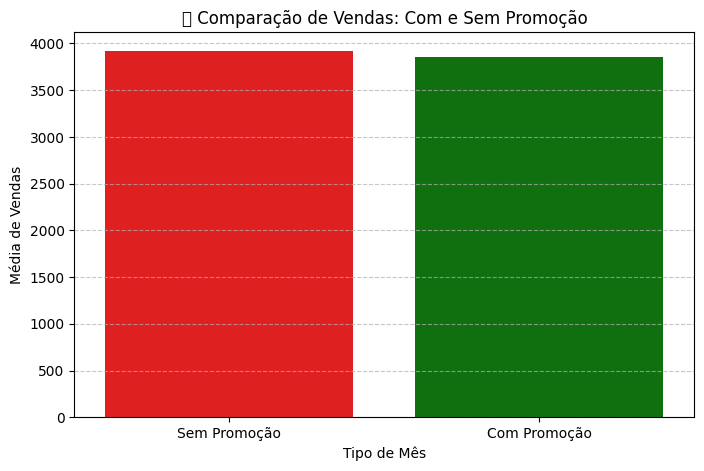

<ipython-input-13-540c288d2a9a>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="com_promocao", y="vendas", data=df_merged, palette=["red", "green"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


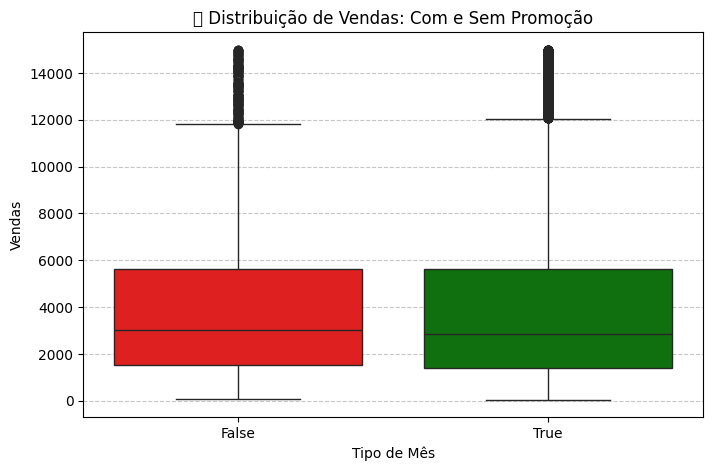

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()

    # Obtém o nome real do arquivo do dicionário de uploads
    nome_real = list(uploaded_files.keys())[0]

    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
        print(f"📊 Colunas encontradas: {list(df.columns)}\n")  # Exibir colunas para depuração
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos arquivos
df_marketing = carregar_arquivo("campanhas_publicitarias_wave_surfboards.csv")
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards.csv")

# 📊 Criar análise se os dados forem carregados corretamente
if df_marketing is not None and df_vendas is not None:
    # 🔹 Normalizar nomes das colunas
    df_marketing.columns = df_marketing.columns.str.strip().str.lower().str.replace(" ", "_")
    df_vendas.columns = df_vendas.columns.str.strip().str.lower().str.replace(" ", "_")

    # 📌 Renomear colunas
    df_marketing.rename(columns={"investimento_(r$)": "orcamento_marketing", "tipo_de_campanha": "tipo_campanha"}, inplace=True)
    df_vendas.rename(columns={"total_venda": "vendas"}, inplace=True)

    # 📆 Converter datas
    if "data" in df_marketing.columns and "data" in df_vendas.columns:
        df_marketing["data"] = pd.to_datetime(df_marketing["data"], errors="coerce")
        df_vendas["data"] = pd.to_datetime(df_vendas["data"], errors="coerce")

        # 🔹 Criar colunas de ano e mês
        df_marketing["ano_mes"] = df_marketing["data"].dt.to_period("M")
        df_vendas["ano_mes"] = df_vendas["data"].dt.to_period("M")

        # 🔹 Unir os DataFrames pelo mês
        df_merged = pd.merge(df_marketing, df_vendas, on="ano_mes", how="inner")

        # 📌 Identificar meses com promoção
        campanhas_promocionais = ["Desconto Especial", "Promoção de Verão", "Sorteio"]
        df_merged["com_promocao"] = df_merged["tipo_campanha"].isin(campanhas_promocionais)

        # 📊 Comparar vendas por mês com e sem promoção
        vendas_comparacao = df_merged.groupby("com_promocao")["vendas"].mean().reset_index()
        vendas_comparacao["com_promocao"] = vendas_comparacao["com_promocao"].map({True: "Com Promoção", False: "Sem Promoção"})

        # 📊 Criar gráfico comparativo
        plt.figure(figsize=(8, 5))
        sns.barplot(x="com_promocao", y="vendas", data=vendas_comparacao, palette=["red", "green"])
        plt.xlabel("Tipo de Mês")
        plt.ylabel("Média de Vendas")
        plt.title("📊 Comparação de Vendas: Com e Sem Promoção")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

                # 📊 Criar Boxplot para comparar a distribuição de vendas
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="com_promocao", y="vendas", data=df_merged, palette=["red", "green"])
        plt.xlabel("Tipo de Mês")
        plt.ylabel("Vendas")
        plt.title("📊 Distribuição de Vendas: Com e Sem Promoção")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()


    else:
        print("❌ Coluna 'Data' não encontrada nos arquivos para realizar a análise.")
else:
    print("❌ Erro no carregamento dos arquivos.")

# 🌱🌞❄️🍂 Slide 12 – Vendas por Estação do Ano

🗣️ "No verão e primavera, as vendas aumentam. É importante a empresa se preparar para esses períodos com estoque e ações promocionais."

📂 Faça o upload do arquivo CSV de historico_vendas_wave_surfboards:


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (10).csv

✅ Arquivo 'historico_vendas_wave_surfboards (10).csv' carregado! 14286 linhas antes da limpeza.
📆 Coluna 'Data' definida como índice de tempo.

✅ Valores ausentes preenchidos nas colunas numéricas.

✅ Dados após limpeza: 14286 linhas restantes.

📂 Faça o upload do arquivo CSV de dados_meteorologicos_wave_surfboards:


Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (9).csv

✅ Arquivo 'dados_meteorologicos_wave_surfboards (9).csv' carregado! 366 linhas antes da limpeza.
📆 Coluna 'Data' definida como índice de tempo.

✅ Valores ausentes preenchidos nas colunas numéricas.

✅ Dados após limpeza: 366 linhas restantes.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


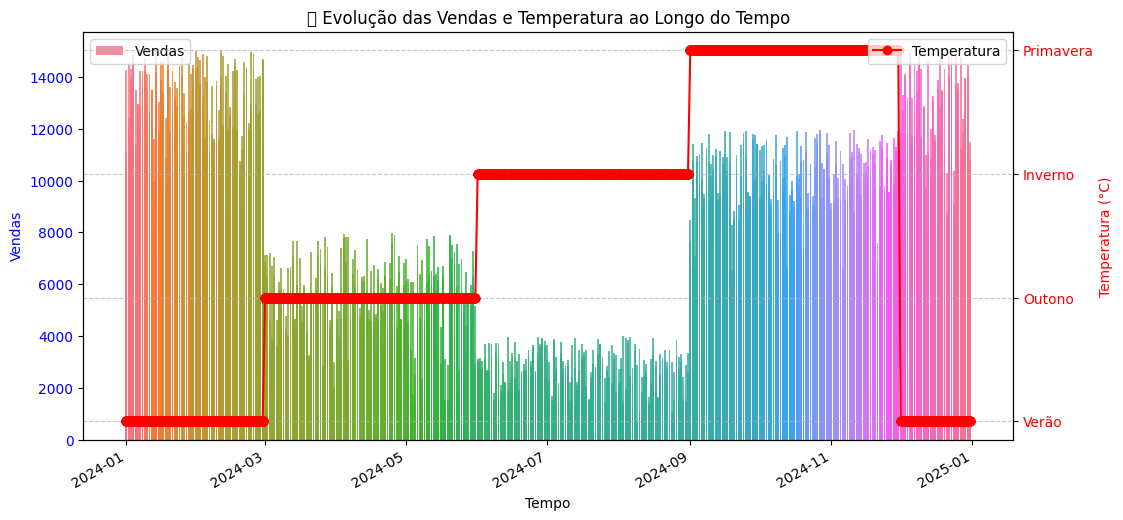

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.impute import SimpleImputer  # Para tratar valores ausentes

# 📌 Função para carregar arquivo CSV
def carregar_arquivo(nome):
    print(f"📂 Faça o upload do arquivo CSV de {nome}:")
    uploaded_file = files.upload()

    for nome_arquivo in uploaded_file.keys():
        try:
            df = pd.read_csv(io.BytesIO(uploaded_file[nome_arquivo]))
            print(f"\n✅ Arquivo '{nome_arquivo}' carregado! {df.shape[0]} linhas antes da limpeza.")

            # 🔹 Limpeza dos dados
            df.drop_duplicates(inplace=True)  # Remove duplicatas
            df.dropna(how='all', inplace=True)  # Remove linhas totalmente vazias
            df.reset_index(drop=True, inplace=True)  # Reseta o índice

            # 📌 Verifica se há uma coluna de data e a converte
            for col in df.columns:
                try:
                    df[col] = pd.to_datetime(df[col])
                    df.set_index(col, inplace=True)
                    print(f"📆 Coluna '{col}' definida como índice de tempo.\n")
                    break
                except:
                    continue

            # 🔹 Selecionar apenas colunas numéricas para imputação
            colunas_numericas = df.select_dtypes(include=[np.number]).columns
            if colunas_numericas.any():
                imputer = SimpleImputer(strategy="mean")  # Preencher valores ausentes com a média
                df[colunas_numericas] = imputer.fit_transform(df[colunas_numericas])
                print("✅ Valores ausentes preenchidos nas colunas numéricas.\n")
            else:
                print("⚠ Nenhuma coluna numérica encontrada para imputação.\n")

            print(f"✅ Dados após limpeza: {df.shape[0]} linhas restantes.\n")
            return df
        except Exception as e:
            print(f"⚠ Erro ao processar {nome_arquivo}: {e}")
            return None

# 📌 Carregar os arquivos
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards")
df_temp = carregar_arquivo("dados_meteorologicos_wave_surfboards")

# 🔹 Verificar se os dois arquivos foram carregados corretamente
if df_vendas is not None and df_temp is not None:
    # 📌 Unir os dados pelo índice de tempo, resolvendo conflito de colunas duplicadas
    df = df_vendas.join(df_temp, how="inner", lsuffix="_vendas", rsuffix="_temp")

    # 📌 Verificar se há colunas de vendas e temperatura
    col_vendas = [col for col in df.columns if 'venda' in col.lower()]
    col_temp = [col for col in df.columns if 'temp' in col.lower()]

    if col_vendas and col_temp:
        col_vendas = col_vendas[0]
        col_temp = col_temp[0]

        # 📊 Gráfico de Evolução das Vendas com Temperatura
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # 🔹 Gráfico de Barras para Vendas
        cores = sns.color_palette("husl", len(df))  # Gera uma paleta de cores
        barras = ax1.bar(df.index, df[col_vendas], color=cores, alpha=0.8, label="Vendas")
        ax1.set_xlabel("Tempo")
        ax1.set_ylabel("Vendas", color="blue")
        ax1.tick_params(axis="y", labelcolor="blue")

        # 🔹 Criar segundo eixo Y para a temperatura
        ax2 = ax1.twinx()
        ax2.plot(df.index, df[col_temp], color="red", marker="o", linestyle="-", label="Temperatura")
        ax2.set_ylabel("Temperatura (°C)", color="red")
        ax2.tick_params(axis="y", labelcolor="red")

        # 🔹 Ajustes finais no gráfico
        plt.title("📊 Evolução das Vendas e Temperatura ao Longo do Tempo")
        fig.autofmt_xdate()  # Ajusta rotação das datas
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # 🔹 Legendas
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

        plt.show()
    else:
        print("❌ Não foram encontradas colunas adequadas de vendas e/ou temperatura.")

# 📊 Slide 13 – Evolução Vendas vs Marketing

🗣️ "Esse comparativo mostra claramente como as campanhas acompanharam o desempenho das vendas ao longo do tempo."

📂 Faça o upload do arquivo CSV de historico_vendas_wave_surfboards:


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (11).csv

✅ Arquivo 'historico_vendas_wave_surfboards (11).csv' carregado! 14286 linhas antes da limpeza.
📆 Coluna 'Data' definida como índice de tempo.

✅ Valores ausentes preenchidos nas colunas numéricas.

✅ Dados após limpeza: 14286 linhas restantes.

📂 Faça o upload do arquivo CSV de campanhas_publicitarias_wave_surfboards:


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (12).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (12).csv' carregado! 43 linhas antes da limpeza.
📆 Coluna 'Data' definida como índice de tempo.

✅ Valores ausentes preenchidos nas colunas numéricas.

✅ Dados após limpeza: 43 linhas restantes.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


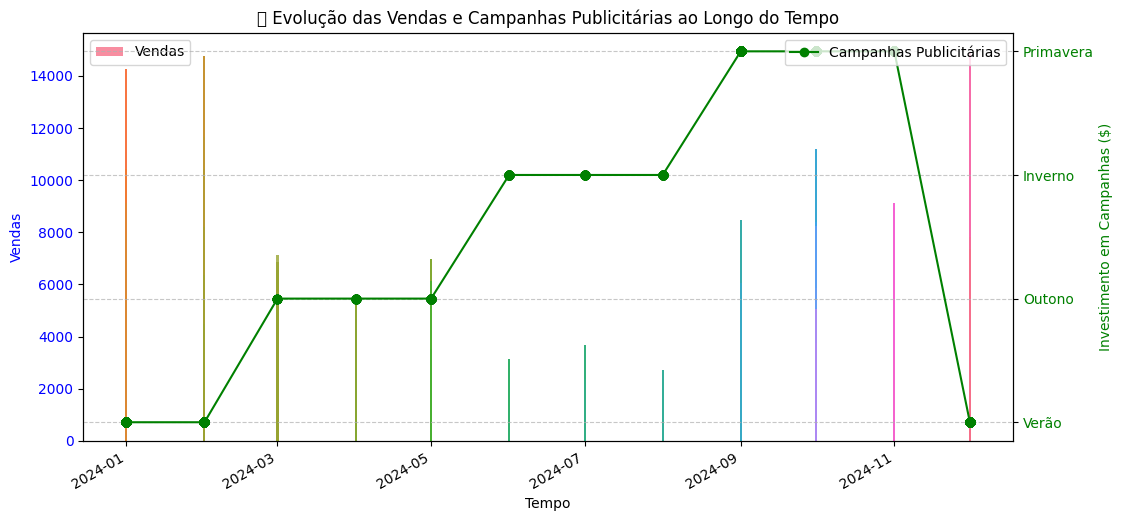

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.impute import SimpleImputer  # Para tratar valores ausentes

# 📌 Função para carregar arquivo CSV
def carregar_arquivo(nome):
    print(f"📂 Faça o upload do arquivo CSV de {nome}:")
    uploaded_file = files.upload()

    for nome_arquivo in uploaded_file.keys():
        try:
            df = pd.read_csv(io.BytesIO(uploaded_file[nome_arquivo]))
            print(f"\n✅ Arquivo '{nome_arquivo}' carregado! {df.shape[0]} linhas antes da limpeza.")

            # 🔹 Limpeza dos dados
            df.drop_duplicates(inplace=True)  # Remove duplicatas
            df.dropna(how='all', inplace=True)  # Remove linhas totalmente vazias
            df.reset_index(drop=True, inplace=True)  # Reseta o índice

            # 📌 Verifica se há uma coluna de data e a converte
            for col in df.columns:
                try:
                    df[col] = pd.to_datetime(df[col])
                    df.set_index(col, inplace=True)
                    print(f"📆 Coluna '{col}' definida como índice de tempo.\n")
                    break
                except:
                    continue

            # 🔹 Selecionar apenas colunas numéricas para imputação
            colunas_numericas = df.select_dtypes(include=[np.number]).columns
            if colunas_numericas.any():
                imputer = SimpleImputer(strategy="mean")  # Preencher valores ausentes com a média
                df[colunas_numericas] = imputer.fit_transform(df[colunas_numericas])
                print("✅ Valores ausentes preenchidos nas colunas numéricas.\n")
            else:
                print("⚠ Nenhuma coluna numérica encontrada para imputação.\n")

            print(f"✅ Dados após limpeza: {df.shape[0]} linhas restantes.\n")
            return df
        except Exception as e:
            print(f"⚠ Erro ao processar {nome_arquivo}: {e}")
            return None

# 📌 Carregar os arquivos
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards")
df_campanhas = carregar_arquivo("campanhas_publicitarias_wave_surfboards")

# 🔹 Verificar se os dois arquivos foram carregados corretamente
if df_vendas is not None and df_campanhas is not None:
    # 📌 Unir os dados pelo índice de tempo, resolvendo conflito de colunas duplicadas
    df = df_vendas.join(df_campanhas, how="inner", lsuffix="_vendas", rsuffix="_campanhas")

    # 📌 Verificar se há colunas de vendas e de campanhas
    col_vendas = [col for col in df.columns if 'venda' in col.lower()]
    col_campanhas = [col for col in df.columns if 'campanha' in col.lower() or 'marketing' in col.lower()]

    if col_vendas and col_campanhas:
        col_vendas = col_vendas[0]
        col_campanhas = col_campanhas[0]

        # 📊 Gráfico de Evolução das Vendas com Campanhas Publicitárias
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # 🔹 Gráfico de Barras para Vendas
        cores = sns.color_palette("husl", len(df))  # Gera uma paleta de cores
        barras = ax1.bar(df.index, df[col_vendas], color=cores, alpha=0.8, label="Vendas")
        ax1.set_xlabel("Tempo")
        ax1.set_ylabel("Vendas", color="blue")
        ax1.tick_params(axis="y", labelcolor="blue")

        # 🔹 Criar segundo eixo Y para Campanhas Publicitárias
        ax2 = ax1.twinx()
        ax2.plot(df.index, df[col_campanhas], color="green", marker="o", linestyle="-", label="Campanhas Publicitárias")
        ax2.set_ylabel("Investimento em Campanhas ($)", color="green")
        ax2.tick_params(axis="y", labelcolor="green")

        # 🔹 Ajustes finais no gráfico
        plt.title("📊 Evolução das Vendas e Campanhas Publicitárias ao Longo do Tempo")
        fig.autofmt_xdate()  # Ajusta rotação das datas
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # 🔹 Legendas
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

        plt.show()
    else:
        print("❌ Não foram encontradas colunas adequadas de vendas e/ou campanhas publicitárias.")

# 🧰 Extra – Geração e ETL dos Dados

Essa parte contém os scripts auxiliares para montar os dados e realizar a engenharia básica.

- `completo.py`


📂 Faça o upload do arquivo: historico_vendas_wave_surfboards.csv


Saving historico_vendas_wave_surfboards.csv to historico_vendas_wave_surfboards (12).csv

✅ Arquivo 'historico_vendas_wave_surfboards (12).csv' carregado com 14286 linhas e 6 colunas.

📂 Faça o upload do arquivo: campanhas_publicitarias_wave_surfboards.csv


Saving campanhas_publicitarias_wave_surfboards.csv to campanhas_publicitarias_wave_surfboards (13).csv

✅ Arquivo 'campanhas_publicitarias_wave_surfboards (13).csv' carregado com 43 linhas e 4 colunas.

📂 Faça o upload do arquivo: dados_meteorologicos_wave_surfboards.csv


Saving dados_meteorologicos_wave_surfboards.csv to dados_meteorologicos_wave_surfboards (10).csv

✅ Arquivo 'dados_meteorologicos_wave_surfboards (10).csv' carregado com 366 linhas e 4 colunas.


📈 **Top 5 Produtos Mais Vendidos:**
            Produto  Quantidade  Total Venda
6   Deck de Prancha        3404   4236987.07
10       Rash Guard        3399   4117184.59
7             Leash        3393   4256445.47
2         Camisa UV        3365   4193036.41
5           Chinelo        3323   4227610.66

🌦 **Vendas por Estação:**
     Estação  Quantidade  Total Venda
3      Verão       16593  26022413.67
2  Primavera       16123  20245648.31
0    Inverno        5031   2110962.61
1     Outono        4873   4159209.87

💰 **Investimento em Marketing por Estação:**
     Estação  Investimento (R$)
3      Verão          434192.48
2  Primavera          362160.45
0    Inverno          280295.16
1     Outono          251575.76

🌡 **Temperatura Média por Estação:**
     Estação  Temperatura Média (°C)


<ipython-input-16-07006de0f199>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produtos_mais_vendidos["Produto"], y=produtos_mais_vendidos["Quantidade"], palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


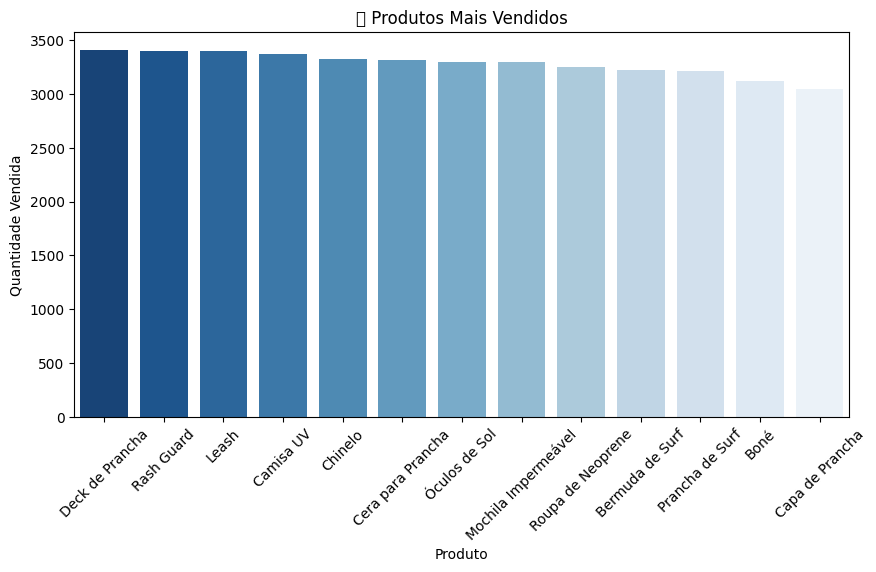

<ipython-input-16-07006de0f199>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_estacao["Estação"], y=vendas_por_estacao["Quantidade"], palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


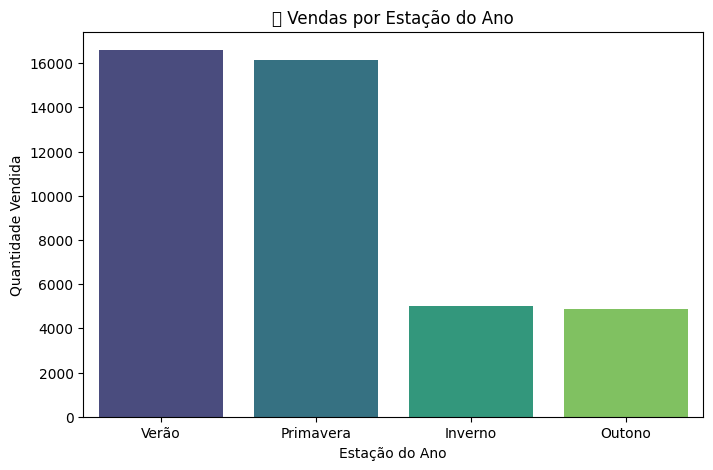

<ipython-input-16-07006de0f199>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investimento_por_estacao["Estação"], y=investimento_por_estacao["Investimento (R$)"], palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


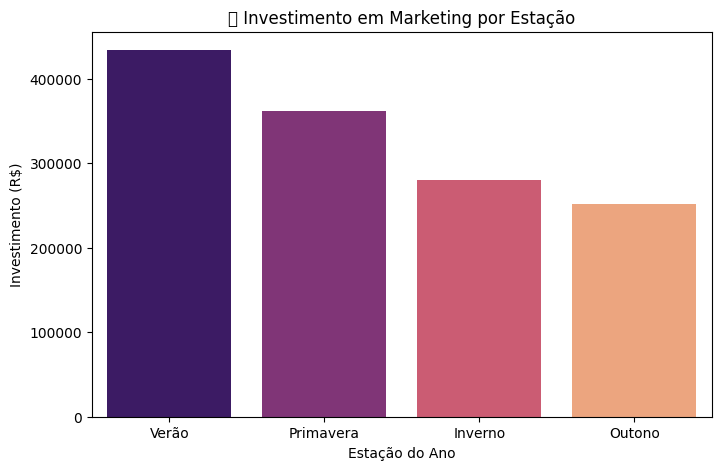

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


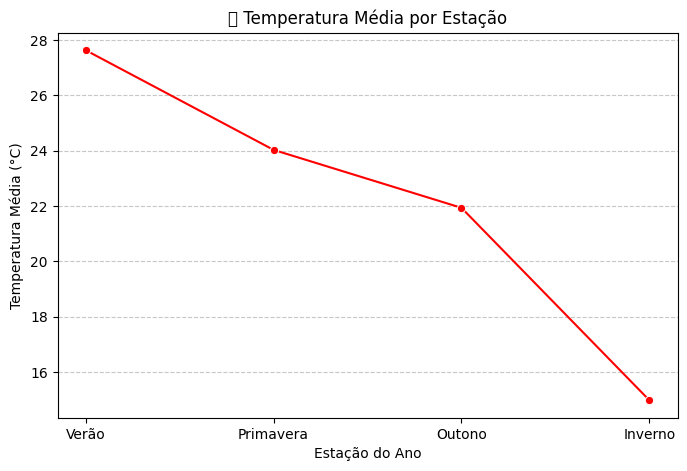

In [16]:
# 📌 Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# 📌 Função para carregar arquivos CSV
def carregar_arquivo(nome_referencia):
    print(f"📂 Faça o upload do arquivo: {nome_referencia}")
    uploaded_files = files.upload()

    nome_real = list(uploaded_files.keys())[0]

    try:
        df = pd.read_csv(io.BytesIO(uploaded_files[nome_real]))
        print(f"\n✅ Arquivo '{nome_real}' carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
        return df
    except Exception as e:
        print(f"⚠ Erro ao processar {nome_real}: {e}")
        return None

# 📌 Upload dos arquivos
df_vendas = carregar_arquivo("historico_vendas_wave_surfboards.csv")
df_marketing = carregar_arquivo("campanhas_publicitarias_wave_surfboards.csv")
df_meteorologia = carregar_arquivo("dados_meteorologicos_wave_surfboards.csv")

# 📊 Criar análise se os dados foram carregados corretamente
if df_vendas is not None and df_marketing is not None and df_meteorologia is not None:

    # 📌 Converter datas para datetime
    df_vendas["Data"] = pd.to_datetime(df_vendas["Data"], errors="coerce")
    df_marketing["Data"] = pd.to_datetime(df_marketing["Data"], errors="coerce")
    df_meteorologia["Data"] = pd.to_datetime(df_meteorologia["Data"], errors="coerce")

    # 📌 Converter valores numéricos corretamente
    df_vendas["Total Venda"] = pd.to_numeric(df_vendas["Total Venda"], errors="coerce")
    df_vendas["Quantidade"] = pd.to_numeric(df_vendas["Quantidade"], errors="coerce")
    df_marketing["Investimento (R$)"] = pd.to_numeric(df_marketing["Investimento (R$)"], errors="coerce")
    df_meteorologia["Temperatura Média (°C)"] = pd.to_numeric(df_meteorologia["Temperatura Média (°C)"], errors="coerce")

    # 📊 🔹 Analisar os produtos mais vendidos
    produtos_mais_vendidos = df_vendas.groupby("Produto").agg({"Quantidade": "sum", "Total Venda": "sum"}).reset_index()
    produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by="Quantidade", ascending=False)

    print("\n📈 **Top 5 Produtos Mais Vendidos:**")
    print(produtos_mais_vendidos.head())

    # 📊 🔹 Analisar a estação do ano com mais vendas
    vendas_por_estacao = df_vendas.groupby("Estação").agg({"Quantidade": "sum", "Total Venda": "sum"}).reset_index()
    vendas_por_estacao = vendas_por_estacao.sort_values(by="Quantidade", ascending=False)

    print("\n🌦 **Vendas por Estação:**")
    print(vendas_por_estacao)

    # 📊 🔹 Analisar o investimento em marketing por estação
    investimento_por_estacao = df_marketing.groupby("Estação").agg({"Investimento (R$)": "sum"}).reset_index()
    investimento_por_estacao = investimento_por_estacao.sort_values(by="Investimento (R$)", ascending=False)

    print("\n💰 **Investimento em Marketing por Estação:**")
    print(investimento_por_estacao)

    # 📊 🔹 Analisar a temperatura média por estação
    temperatura_por_estacao = df_meteorologia.groupby("Estação").agg({"Temperatura Média (°C)": "mean"}).reset_index()
    temperatura_por_estacao = temperatura_por_estacao.sort_values(by="Temperatura Média (°C)", ascending=False)

    print("\n🌡 **Temperatura Média por Estação:**")
    print(temperatura_por_estacao)

    # 📊 🔹 Criar gráfico de barras para os produtos mais vendidos
    plt.figure(figsize=(10, 5))
    sns.barplot(x=produtos_mais_vendidos["Produto"], y=produtos_mais_vendidos["Quantidade"], palette="Blues_r")
    plt.xticks(rotation=45)
    plt.xlabel("Produto")
    plt.ylabel("Quantidade Vendida")
    plt.title("📦 Produtos Mais Vendidos")
    plt.show()

    # 📊 🔹 Criar gráfico de barras para vendas por estação
    plt.figure(figsize=(8, 5))
    sns.barplot(x=vendas_por_estacao["Estação"], y=vendas_por_estacao["Quantidade"], palette="viridis")
    plt.xlabel("Estação do Ano")
    plt.ylabel("Quantidade Vendida")
    plt.title("🌍 Vendas por Estação do Ano")
    plt.show()

    # 📊 🔹 Criar gráfico de barras para investimento em marketing por estação
    plt.figure(figsize=(8, 5))
    sns.barplot(x=investimento_por_estacao["Estação"], y=investimento_por_estacao["Investimento (R$)"], palette="magma")
    plt.xlabel("Estação do Ano")
    plt.ylabel("Investimento (R$)")
    plt.title("💰 Investimento em Marketing por Estação")
    plt.show()

    # 📊 🔹 Criar gráfico de linha para a temperatura média por estação
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=temperatura_por_estacao["Estação"], y=temperatura_por_estacao["Temperatura Média (°C)"], marker="o", color="red")
    plt.xlabel("Estação do Ano")
    plt.ylabel("Temperatura Média (°C)")
    plt.title("🌡 Temperatura Média por Estação")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

else:
    print("❌ Erro no carregamento dos arquivos.")

# 🧰 Extra – Geração CSV dos Dados

Essa parte contém os scripts auxiliares para montar os dados e realizar a engenharia básica.

- `gerador_csv_wave_surf.py`

In [ ]:
import pandas as pd
import random
import faker
from datetime import datetime, timedelta
from google.colab import files

# Criar instância do Faker
fake = faker.Faker()

# Definição de produtos vendidos na loja Wave Surfboards
produtos_surf = [
    "Prancha de Surf", "Roupa de Neoprene", "Leash", "Deck de Prancha",
    "Capa de Prancha", "Cera para Prancha", "Rash Guard", "Óculos de Sol",
    "Boné", "Bermuda de Surf", "Camisa UV", "Chinelo", "Mochila Impermeável"
]

# Definição das estações do ano e impacto nas vendas
estacoes = {
    "Verão": 1.5,  # Aumento de 50% nas vendas
    "Primavera": 1.2,  # Aumento de 20% nas vendas
    "Outono": 0.8,  # Queda de 20% nas vendas
    "Inverno": 0.4  # Queda drástica de 60% nas vendas
}

# Criar listas para armazenar os dados
historico_vendas = []
dados_meteorologicos = []
campanhas_publicitarias = []

# Simular dados para cada dia do ano
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)
data_atual = data_inicial

while data_atual <= data_final:
    mes = data_atual.month

    # Determinar a estação do ano
    if mes in [12, 1, 2]:
        estacao = "Verão"
        temperatura_base = 28
    elif mes in [3, 4, 5]:
        estacao = "Outono"
        temperatura_base = 22
    elif mes in [6, 7, 8]:
        estacao = "Inverno"
        temperatura_base = 15
    else:
        estacao = "Primavera"
        temperatura_base = 24

    # Ajustar fator sazonal
    fator_sazonal = estacoes[estacao]

    # Gerar dados meteorológicos diários
    temperatura = round(random.uniform(temperatura_base - 3, temperatura_base + 3), 1)
    precipitacao = round(random.uniform(10, 200) if estacao in ["Verão", "Outono"] else random.uniform(0, 50), 1)

    dados_meteorologicos.append({
        "Data": data_atual,
        "Estação": estacao,
        "Temperatura Média (°C)": temperatura,
        "Precipitação (mm)": precipitacao
    })

    # Gerar dados de vendas diárias
    num_vendas = random.randint(20, 100) if estacao in ["Verão", "Primavera"] else random.randint(5, 30)

    for _ in range(num_vendas):
        produto = random.choice(produtos_surf)
        quantidade = random.randint(1, 5)
        preco_unitario = round(random.uniform(100, 2000), 2)
        total_venda = round(preco_unitario * quantidade * fator_sazonal, 2)

        historico_vendas.append({
            "Data": data_atual,
            "Produto": produto,
            "Quantidade": quantidade,
            "Preço Unitário": preco_unitario,
            "Total Venda": total_venda,
            "Estação": estacao
        })

    # Gerar campanhas publicitárias mensais
    if data_atual.day == 1:  # Criar campanhas no primeiro dia de cada mês
        num_campanhas = random.randint(3, 6) if estacao in ["Verão", "Primavera"] else random.randint(1, 3)
        for _ in range(num_campanhas):
            campanhas_publicitarias.append({
                "Data": data_atual,
                "Estação": estacao,
                "Tipo de Campanha": random.choice(["Promoção de Verão", "Desconto Especial", "Sorteio", "Campanha Online"]),
                "Investimento (R$)": round(random.uniform(5000, 50000), 2)
            })

    # Avançar para o próximo dia
    data_atual += timedelta(days=1)

# Criar DataFrames
df_vendas = pd.DataFrame(historico_vendas)
df_meteorologia = pd.DataFrame(dados_meteorologicos)
df_campanhas = pd.DataFrame(campanhas_publicitarias)

# Salvar arquivos
arquivo_vendas = "historico_vendas_wave_surfboards.csv"
arquivo_meteorologia = "dados_meteorologicos_wave_surfboards.csv"
arquivo_campanhas = "campanhas_publicitarias_wave_surfboards.csv"

df_vendas.to_csv(arquivo_vendas, index=False)
df_meteorologia.to_csv(arquivo_meteorologia, index=False)
df_campanhas.to_csv(arquivo_campanhas, index=False)

# Fazer download dos arquivos
def download_arquivo(arquivo):
    files.download(arquivo)

download_arquivo(arquivo_vendas)
download_arquivo(arquivo_meteorologia)
download_arquivo(arquivo_campanhas)